# Задача определения частей речи, Part-Of-Speech Tagger (POS) (10 баллов)

Мы будем решать задачу определения частей речи (POS-теггинга).

In [ ]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import brown
import matplotlib.pyplot as plt
from collections import Counter

Чтобы решить задание, почитайте http://www.nltk.org/book/

Загрузим brown корпус

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

<b>Существует не одна система тегирования, поэтому будьте внимательны, когда прогнозируете тег слов в тексте и вычисляете качество прогноза. Можете получить несправедливо низкое качество вашего решения.

Cейчас будем использовать универсальную систему тегирования universal_tagset

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

Мы имеем массив предложений пар (слово-тег)

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

Первое предложение

In [ ]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Все пары (слово-тег)

In [ ]:
brown_tagged_words = brown.tagged_words(tagset='universal')
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Проанализируйте данные, с которыми Вы работаете. Используйте `nltk.FreqDist()` для подсчета частоты встречаемости тега и слова в нашем корпусе. Под частой элемента подразумевается кол-во этого элемента в корпусе.

In [ ]:
# Приведем слова к нижнему регистру
brown_tagged_words = list(map(lambda x: (x[0].lower(), x[1]), brown_tagged_words))

In [ ]:
print('Кол-во предложений: ', len(brown_tagged_sents))
tags = [tag for (word, tag) in brown_tagged_words] # наши теги
words = [word for (word, tag) in brown_tagged_words] # наши слова

tag_num = pd.Series(nltk.FreqDist(tags)).sort_values(ascending=False) # тег - кол-во тега в корпусе
word_num = pd.Series(nltk.FreqDist(words)).sort_values(ascending=False) # слово - кол-во слова в корпусе

Кол-во предложений:  57340


In [ ]:
tag_num

NOUN    275558
VERB    182750
.       147565
ADP     144766
DET     137019
ADJ      83721
ADV      56239
PRON     49334
CONJ     38151
PRT      29829
NUM      14874
X         1386
dtype: int64

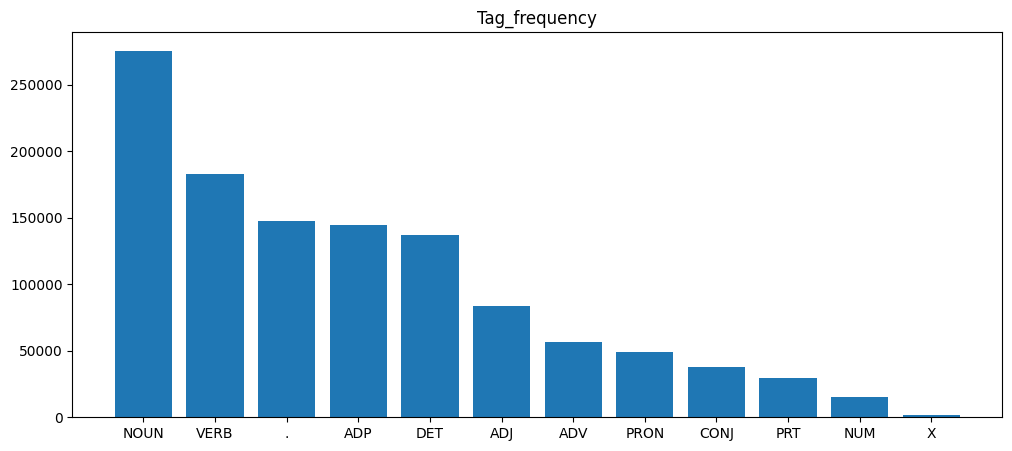

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(tag_num.index, tag_num.values)
plt.title("Tag_frequency")
plt.show()

In [ ]:
word_num[:5]

the    69971
,      58334
.      49346
of     36412
and    28853
dtype: int64

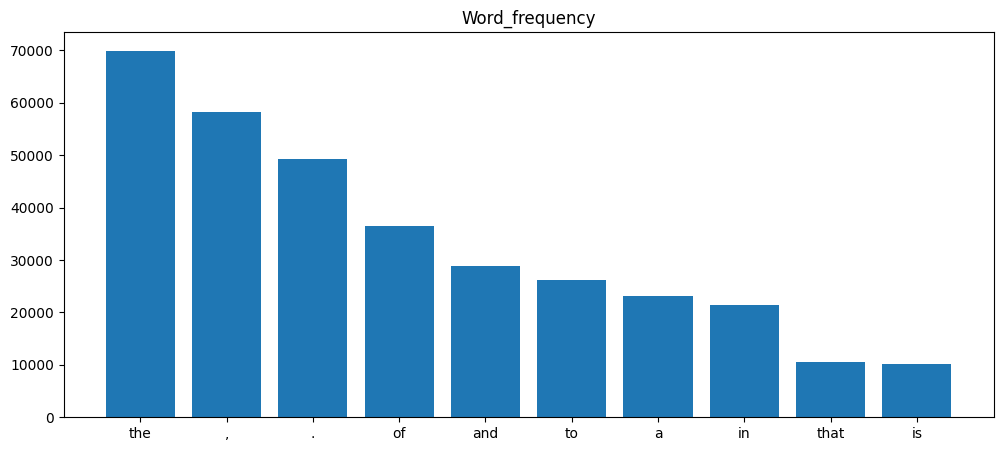

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(word_num.index[:10], word_num.values[:10])
plt.title("Word_frequency")
plt.show()

### Вопрос 1:
* Кол-во слова `cat` в корпусе? **(0.5 балл)**

In [ ]:
word_num["cat"]

23

### Вопрос 2:
* Самое популярное слово с самым популярным тегом? **(0.5 балл)**


In [ ]:
# Выбираем сначала слова с самым популярным тегом, а затем среди них выбираем самое популярное слово.
pop_tag_w = [word for (word, tag) in brown_tagged_words if tag == tag_num.keys()[0]]
pd.Series(nltk.FreqDist(pop_tag_w)).sort_values(ascending=False).keys()[0]

'time'

Cделайте разбиение выборки на обучение и контроль в отношении 9:1. **(0.5 балл)**

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))
my_brown_tagged_sents = np.array(my_brown_tagged_sents)

from sklearn.model_selection import train_test_split
train_sents, test_sents = train_test_split(my_brown_tagged_sents, test_size = 0.1, random_state=0,)

<ipython-input-22-f33ad562a33c>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  my_brown_tagged_sents = np.array(my_brown_tagged_sents)


In [ ]:
len(train_sents), len(test_sents)
train_sents

array([list([('hal', 'NOUN'), (',', '.'), ('the', 'DET'), ('linguist', 'NOUN'), (',', '.'), ('saw', 'VERB'), ('the', 'DET'), ('glittering', 'VERB'), ('discs', 'NOUN'), ('and', 'CONJ'), ('necklaces', 'NOUN'), ('in', 'ADP'), ('terms', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('languages', 'NOUN'), ('spoken', 'VERB'), ('therein', 'ADV'), ('.', '.')]),
       list([('.', '.')]),
       list([('on', 'ADP'), ('july', 'NOUN'), ('11', 'NUM'), ('the', 'DET'), ('head', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('mineral-rich', 'ADJ'), ('province', 'NOUN'), ('of', 'ADP'), ('katanga', 'NOUN'), (',', '.'), ('moise', 'NOUN'), ('tshombe', 'NOUN'), (',', '.'), ('announced', 'VERB'), ('that', 'ADP'), ('his', 'DET'), ('province', 'NOUN'), ('had', 'VERB'), ('seceded', 'VERB'), ('from', 'ADP'), ('the', 'DET'), ('country', 'NOUN'), ('.', '.')]),
       ...,
       list([('the', 'DET'), ('card', 'NOUN'), ('the', 'DET'), ('man', 'NOUN'), ('i', 'PRON'), ('was', 'VERB'), ('shadowing', 'VERB'), ('had', 'VERB'), ('

## DefaultTagger

### Вопрос 3:
* Какое качество вы бы получили, если бы предсказывали любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой)? **(0.5 балл)**

Вы можете использовать DefaultTagger(метод tag для предсказания частей речи предложения).

In [ ]:
from nltk.tag import DefaultTagger
tags2 = [tag for (word, tag) in sent for sent in train_sents]
cnt = Counter(tags2)
default_tagger = DefaultTagger(cnt.most_common(1)[0][0])

In [ ]:
true_pred = 0
num_pred = 0

for sent in test_sents:
    tags = np.array([tag for (word, tag) in sent])
    words = np.array([word for (word, tag) in sent])

    true_pred += Counter(tags)[cnt.most_common(1)[0][0]]
    num_pred += len(words)
print("Accuracy:", true_pred / num_pred * 100, '%')

Accuracy: 2.586713697824809 %


## LSTMTagger

### Подготовка данных

Изменим структуру данных

In [ ]:
pos_data = [list(zip(*sent)) for sent in brown_tagged_sents]
print(pos_data[0])

[('The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'), ('DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', '.', 'DET', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'VERB', 'NOUN', '.')]


Используем pytorch

In [ ]:
from torchtext.data import Field, BucketIterator
import torchtext

# наши поля
WORD = Field(lower=True)
TAG = Field(unk_token=None) # все токены нам извсетны

# создаем примеры
examples = []
for words, tags in pos_data:
    examples.append(torchtext.data.Example.fromlist([list(words), list(tags)], fields=[('words', WORD), ('tags', TAG)]))

ImportError: ignored

Вот один пример:

In [ ]:
print(vars(examples[0]))

Теперь формируем наш датасет

In [ ]:
# кладем примеры в наш датасет
dataset = torchtext.data.Dataset(examples, fields=[('words', WORD), ('tags', TAG)])

train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.1, 0.1])

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Построим словари. Параметр `min_freq` выберете сами. При построении словаря испольузем только **train** **(0.5 балл)**

In [ ]:
WORD.build_vocab('''your code''', min_freq='''your code''')
TAG.build_vocab('''your code''')

print(f"Unique tokens in source (ru) vocabulary: {len(WORD.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TAG.vocab)}")

print(WORD.vocab.itos[::200])
print(TAG.vocab.itos)

Здесь вы увидете токен `unk` и `pad`. Первый служит для обозначения слов, которых у нас нет в словаре. Второй служит для того, что объекты в одном батче были одинакового размера.

In [ ]:
print(vars(train_data.examples[9]))

Посмотрим с насколько большими предложениями мы имеем дело

In [ ]:
length = map(len, [vars(x)['words'] for x in train_data.examples])

plt.figure(figsize=[8, 4])
plt.title("Length distribution in Train data")
plt.hist(list(length), bins=20);

Для обучения `LSTM` лучше использовать colab

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

Для более быстрого и устойчивого обучения сгруппируем наши данные по батчам

In [ ]:
# бьем нашу выборку на батч, не забывая сначала отсортировать выборку по длине
def _len_sort_key(x):
    return len(x.words)

BATCH_SIZE = 32

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device,
    sort_key=_len_sort_key
)

In [ ]:
# посморим  на количество батчей
list(map(len, [train_iterator, valid_iterator, test_iterator]))

### Модель и её обучение

Инициализируем нашу модель. Прочитайте про dropout [тут](https://habr.com/ru/company/wunderfund/blog/330814/). **(3 балла)**

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, input_dim, emb_dim, hid_dim, output_dim, dropout):
        super().__init__()


        self.embeddings = '''your code'''
        self.dropout = nn.Dropout(p=dropout)

        self.rnn = nn.LSTM('''your code''')
        self.tag = nn.Linear(hid_dim, output_dim)

    def forward(self, sent):

        #sent = [sent len, batch size]

        # не забываем применить dropout к embedding
        embedded = self.dropout('''your code''')

        output, _ = self.rnn(embedded)
        #output = [sent len, batch size, hid dim * n directions]

        prediction = self.tag('''your code''')

        return prediction

# параметры модели
INPUT_DIM = len(WORD.vocab)
OUTPUT_DIM = len(TAG.vocab)
EMB_DIM = '''your code'''
HID_DIM = '''your code'''
DROPOUT = 0.5

model = LSTMTagger('''your code''').to(device)

# инициализируем веса
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)

model.apply(init_weights)

Подсчитаем количество обучаемых параметров нашей модели. Используйте метод `numel()`. **(1 балл)**

In [ ]:
def count_parameters(model):
    return '''your code'''

print(f'The model has {count_parameters(model):,} trainable parameters')

Погнали обучать **(2 балла)**

In [ ]:
PAD_IDX = TAG.vocab.stoi['<pad>']
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()

    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):

        words = '''your code'''
        tags = '''your code'''

        optimizer.zero_grad()

        output = model('''your code''')

        #tags = [sent len, batch size]
        #output = [sent len, batch size, output dim]

        output = '''your code'''
        tags = tags.view(-1)

        #tags = [sent len * batch size]
        #output = [sent len * batch size, output dim]

        loss = criterion('''your code''')

        loss.backward()

        # Gradient clipping(решение проблемы взрыва граденты), clip - максимальная норма вектора
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        optimizer.step()

        epoch_loss += loss.item()

        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')

            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()

            plt.show()


    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()

    epoch_loss = 0

    history = []

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            words = '''your code'''
            tags = '''your code'''

            output = model('''your code''')

            #tags = [sent len, batch size]
            #output = [sent len, batch size, output dim]

            output = '''your code'''
            tags = tags.view(-1)

            #tags = [sent len * batch size]
            #output = [sent len * batch size, output dim]

            loss = criterion('''your code''')

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import time
import math
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = '''your code'''
CLIP = '''your code'''

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

### Применение модели
 **(1 балл)**

In [ ]:
def accuracy_model(model, iterator):
    model.eval()

    true_pred = 0
    num_pred = 0

    with torch.no_grad():
        for i, batch in enumerate(iterator):

           '''your code'''

            output = model('''your code''')

            #output = [sent len, batch size, output dim]
            # Выбираем для каждого слова индекс тэга с максимальной вероятностью
            output = '''your code'''

            #output = [sent len, batch size]
            predict_tags = output.cpu().numpy()
            true_tags = tags.cpu().numpy()

            true_pred += np.sum((true_tags == predict_tags) & (true_tags != PAD_IDX))
            num_pred += np.prod(true_tags.shape) - (true_tags == PAD_IDX).sum()

    return round(true_pred / num_pred * 100, 3)

In [ ]:
print("Accuracy:", accuracy_model(model, test_iterator), '%')

Вы можете улучшить качество, изменяя параметры модели. Вам неоходимо добиться качества не меньше, чем `accuracy = 92 %`.

In [ ]:
best_model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))
assert accuracy_model(best_model, test_iterator) >= 92

### **Если качество сети меньше 92 процентов, то снимается половина от всех полученных баллов .<br> То есть максимум в этом случае 5 баллов за работу.**




Пример решение нашей задачи:

In [ ]:
def print_tags(model, data):
    model.eval()

    with torch.no_grad():
        words, _ = data
        example = torch.LongTensor([WORD.vocab.stoi[elem] for elem in words]).unsqueeze(1).to(device)

        output = model(example).argmax(dim=-1).cpu().numpy()
        tags = [TAG.vocab.itos[int(elem)] for elem in output]

        for token, tag in zip(words, tags):
            print(f'{token:15s}{tag}')

In [ ]:
print_tags(model, pos_data[-1])

## Вывод:
**(0.5 балл)**